## **Cell 1 — Imports (All Libraries Used in the Notebook)**

This cell loads all external libraries required throughout the notebook. These libraries support data processing, visualization, normalization, and display formatting:

pandas – for loading and manipulating datasets

numpy – for numerical operations

matplotlib.pyplot – for plotting charts and figures

seaborn – for enhanced statistical visualizations

MinMaxScaler – for normalizing numeric data

display – for rendering DataFrames cleanly in Jupyter notebooks

In [2]:
# =============
# CELL 1: IMPORTS (All Libraries Used in the Notebook)
# =============

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from IPython.display import display
import geopandas as gpd


## **Cell 2 — Load GAUL Geographic Datasets**

This cell loads the three GAUL administrative boundary datasets for Africa:

A0 → Country-level boundaries

A1 → First-level administrative divisions (e.g., states/provinces)

A2 → Second-level administrative divisions (e.g., districts)

These datasets provide the geographic structure needed for linking spatial pest-impact data to administrative regions. After loading, the shape of each dataset is printed for verification.

In [3]:
# %%
# ==============================================================================
# CELL 2: LOAD THE 3 GAUL GEOGRAPHIC DATASETS
# ==============================================================================

data1 = pd.read_parquet(r"A:\my_codes\my_project\Additional projects\Climate Impacts on Crop Pests  and Disease\gaul_a0_africa.parquet")
data2 = pd.read_parquet(r"A:\my_codes\my_project\Additional projects\Climate Impacts on Crop Pests  and Disease\gaul_a1_africa.parquet")
data3 = pd.read_parquet(r"A:\my_codes\my_project\Additional projects\Climate Impacts on Crop Pests  and Disease\gaul_a2_africa.parquet")

print(f"✓ Dataset 1: {data1.shape}")
print(f"✓ Dataset 2: {data2.shape}")
print(f"✓ Dataset 3: {data3.shape}")


✓ Dataset 1: (55, 16)
✓ Dataset 2: (719, 16)
✓ Dataset 3: (6670, 16)


## **Cell 3 — Merge GAUL Datasets**

In this cell, we prepare the three GAUL administrative datasets for analysis by:

Dropping fully empty columns — Some GAUL parquet files contain unused geometry-related fields that are completely empty.

Merging the datasets — All three administrative levels (A0, A1, A2) are concatenated into a single unified dataframe.

Resetting the index to keep the combined dataset clean and continuous.

The resulting dataframe (df) contains all geographic units across multiple administrative levels and will be used in later analyses.

In [ ]:
# =============
# CELL 3: MERGE DATASETS
# =============

# Remove fully empty columns
data1 = data1.dropna(axis=1, how='all')
data2 = data2.dropna(axis=1, how='all')
data3 = data3.dropna(axis=1, how='all')

# Merge the three datasets into one
df = pd.concat([data1, data2, data3], ignore_index=True)

df  # Display merged dataframe

,iso3,admin0_name,iso3n,gaul0_code,un_subregion,un_a0_en,un_a0_fr,un_a0_es,currency_code,currency_name,geometry,admin1_name,gaul1_code,admin2_name,gaul2_code
0,AGO,Angola,24,102,Sub-Saharan Africa,Angola,Angola,Angola,AOA,Kwanza,b'\x01\x06\x00\x00\x00\x02\x00\x00\x00\x01\x03...,NaN,NaN,NaN,NaN
1,BDI,Burundi,108,109,Sub-Saharan Africa,Burundi,Burundi,Burundi,BIF,Burundi Franc,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00#\x00\x0...,NaN,NaN,NaN,NaN
2,BEN,Benin,204,105,Sub-Saharan Africa,Benin,Bénin,Benin,XOF,CFA Franc BCEAO,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00>\x00\x0...,NaN,NaN,NaN,NaN
3,BFA,Burkina Faso,854,108,Sub-Saharan Africa,Burkina Faso,Burkina Faso,Burkina Faso,XOF,CFA Franc BCEAO,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00j\x00\x0...,NaN,NaN,NaN,NaN
4,BWA,Botswana,72,106,Sub-Saharan Africa,Botswana,Botswana,Botswana,BWP,Pula,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00l\x00\x0...,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7439,EGY,Egypt,818,133,Northern Africa,Egypt,Égypte,Egipto,EGP,Egyptian Pound,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x15\x00...,Hala'Ib Triangle,1349.0,Hala'Ib Triangle,103524.0
7440,SDN,Sudan,729,133,Northern Africa,Sudan,Soudan,Sudán,SDG,Sudanese Pound,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\x15\x00...,Hala'Ib Triangle,1349.0,Hala'Ib Triangle,103524.0
7441,KEN,Kenya,404,135,Sub-Saharan Africa,Kenya,Kenya,Kenya,KES,Kenyan Shilling,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\r\x00\x...,Ilemi Triangle,1351.0,Ilemi Triangle,103526.0
7442,SSD,South Sudan,728,135,Sub-Saharan Africa,South Sudan,Soudan du Sud,Sudán del Sur,SSP,South Sudanese Pound,b'\x01\x03\x00\x00\x00\x01\x00\x00\x00\r\x00\x...,Ilemi Triangle,1351.0,Ilemi Triangle,103526.0


## **Cell 4 — Clean Geographic Data**

In this cell, we clean the merged GAUL geographic dataset (df) to ensure it is ready for analysis.
The steps include:

Removing duplicate rows (excluding geometry fields), since some administrative units may overlap or repeat across levels.

Filling missing numeric values with the median of each column — this prevents issues during normalization.

Filling remaining missing values (usually text data) with 'Unknown'.

A summary of the cleaned dataset shape is printed at the end.

In [ ]:
# =============
# CELL 4: CLEAN DATA
# =============

print("\n" + "="*50)
print("STEP 3: CLEANING DATA")
print("="*50)

# Remove duplicate rows (ignore geometry fields)
cols = [c for c in df.columns if c not in ['geometry', 'geometry_bbox']]
df = df.drop_duplicates(subset=cols)

# Fill numeric NaNs with median
df = df.fillna(df.median(numeric_only=True))

# Fill remaining NaNs (usually strings) with 'Unknown'
df = df.fillna('Unknown')

print(f"✓ Cleaned shape: {df.shape}")



STEP 3: CLEANING DATA
✓ Cleaned shape: (7444, 15)


## **Cell 5 — Normalize Numeric Columns**

This cell normalizes all numeric columns in the dataset using MinMaxScaler, which scales values to a 0–1 range.

Why normalize?

Different numeric fields may have different scales (e.g., population, area, IDs).

Normalization ensures features are comparable and helps prevent large-valued columns from dominating future analyses or models.

Only numeric columns not related to geometry are normalized

In [ ]:
# =============
# CELL 5: NORMALIZE DATA
# =============

print("\n" + "="*50)
print("STEP 4: NORMALIZING DATA")
print("="*50)

# Identify numeric columns (exclude geometry-related fields)
numeric_cols = [
    c for c in df.select_dtypes(include=['float64', 'int64']).columns
    if 'geom' not in c.lower()
]

# Apply MinMax scaling
if numeric_cols:
    df[numeric_cols] = MinMaxScaler().fit_transform(df[numeric_cols])

print(f"✓ Normalized {len(numeric_cols)} columns | Shape: {df.shape}")



STEP 4: NORMALIZING DATA
✓ Normalized 2 columns | Shape: (7444, 15)


## **Cell 6 — Encode Categorical Columns**

This cell converts all non-numeric (categorical) columns into numerical format using one-hot encoding.
This is important because many analysis or modeling steps require numeric inputs.

Steps performed:

Identify all object/string columns, excluding any that contain geometry information.

Apply pd.get_dummies() to convert these columns into binary indicator variables.

Use drop_first=True to avoid multicollinearity by removing one category from each encoded feature.

The shape after encoding is printed.

In [ ]:
# =============
# CELL 6: ENCODE CATEGORICAL DATA
# =============

print("\n--- STEP 5: ENCODING CATEGORICAL DATA ---")

# Identify object-type columns (exclude geometry-related columns)
cat_cols = [
    col for col in df.select_dtypes(include='object').columns
    if 'geom' not in col.lower()
]

# One-hot encode categorical columns
if cat_cols:
    df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

print(f"Encoded: {len(cat_cols)} columns | Shape: {df.shape}")



--- STEP 5: ENCODING CATEGORICAL DATA ---
Encoded: 10 columns | Shape: (7444, 7600)


## **Cell 7 — Load Pest-Disease Impact Dataset**

This cell loads the pest-yield-impact dataset from S3.
This dataset contains estimates of crop yield losses (%) due to pests and diseases across Africa under different climate models and future time horizons.

This dataset will be used for:

Crop vulnerability analysis

Country-level comparisons

Time-series change detection (e.g., 2040 → 2060)

Scenario-based risk assessment

After loading, we print:

Dataset shape

Number of unique countries

Number of unique crops

Available time periods

In [ ]:
# =============
# CELL 7: LOAD PEST-DISEASE IMPACT DATA
# =============

print("\n--- Loading Pest-Disease Data ---")

pest_data = pd.read_parquet(
    's3://digital-atlas/domain=impacts/type=pest-disease/source=rohr_notre-dame/region=africa/processing=aggregated/pest-yield-impact_pct.parquet'
)

print(f"Loaded: {pest_data.shape}")
print(f"Countries: {pest_data['admin0_name'].nunique()}, Crops: {pest_data['crop'].nunique()}")
print(f"Times: {pest_data['time'].unique()}")



--- Loading Pest-Disease Data ---
Loaded: (833728, 14)
Countries: 55, Crops: 4
Times: ['2040' '2060']


## **Cell 8 — Analysis 1: Most Vulnerable Crops**

This cell identifies which crops are most affected by pests and diseases based on average percentage yield loss.

Steps performed:

Group the dataset by crop.

Compute four metrics for each crop:

avg_impact → mean yield loss %

max_impact → highest observed loss

min_impact → lowest observed loss

records → number of data points available

Sort crops by average impact in descending order.

Print the most vulnerable and least vulnerable crops.

This provides a clear ranking of crop susceptibility.

In [ ]:
# =============
# CELL 8: ANALYSIS 1 - MOST VULNERABLE CROPS
# =============

print("\n--- Analysis 1: Crop Vulnerability ---")

crops_impact = pest_data.groupby('crop')['value'].agg([
    ('avg_impact', 'mean'),
    ('max_impact', 'max'),
    ('min_impact', 'min'),
    ('records', 'count')
]).sort_values('avg_impact', ascending=False)

print(crops_impact)
print(f"Most vulnerable: {crops_impact.index[0]} ({crops_impact['avg_impact'].iloc[0]:.2f}%)")
print(f"Least vulnerable: {crops_impact.index[-1]} ({crops_impact['avg_impact'].iloc[-1]:.2f}%)")



--- Analysis 1: Crop Vulnerability ---
       avg_impact  max_impact  min_impact  records
crop                                              
rice     1.843986   15.117545  -16.236958   207032
maize    1.480566   11.331867  -12.170959   207032
wheat    1.430306   10.808315  -11.608642   207032
soy      1.426923   10.773076  -11.570793   207032
Most vulnerable: rice (1.84%)
Least vulnerable: soy (1.43%)


## **Cell 9 — Analysis 2: Country–Crop Vulnerability**

This cell measures which specific country–crop combinations experience the highest pest and disease impacts.

Why this matters:
Different crops are important in different countries, and pest pressure varies spatially.
This analysis highlights critical hotspots, such as:

A crop highly vulnerable in a specific country

Regions where multiple crops face elevated pest threats

Steps performed:

Group the dataset by country (admin0_name) and crop.

Compute the average pest impact (%) for each pair.

Sort results from highest to lowest.

Display the top 20 most affected country–crop combinations.

In [ ]:
# =============
# CELL 9: ANALYSIS 2 - VULNERABILITY BY COUNTRY & CROP
# =============

print("\n--- Analysis 2: Country-Crop Vulnerability ---")

# Group by both country and crop, calculate average impact
country_crop = pest_data.groupby(['admin0_name', 'crop'])['value'].mean().reset_index()

# Sort from highest to lowest impact
country_crop = country_crop.sort_values('value', ascending=False)

print("Top 20 highest impact country-crop pairs:")
print(country_crop.head(20).to_string(index=False))



--- Analysis 2: Country-Crop Vulnerability ---
Top 20 highest impact country-crop pairs:
 admin0_name  crop    value
    Eswatini  rice 4.663592
     Tunisia  rice 3.799855
    Eswatini maize 3.695040
     Lesotho  rice 3.581335
    Eswatini wheat 3.561091
    Eswatini   soy 3.552076
South Africa  rice 3.536425
     Algeria  rice 3.469641
    Botswana  rice 3.237246
     Tunisia maize 3.017095
     Morocco  rice 2.910882
     Tunisia wheat 2.908841
     Tunisia   soy 2.901554
     Lesotho maize 2.851096
South Africa maize 2.809984
     Algeria maize 2.759433
     Lesotho wheat 2.750105
     Lesotho   soy 2.743308
  Madagascar  rice 2.717215
South Africa wheat 2.709519


## **Cell 10 — Analysis 3: Vulnerability Over Time (2040 vs 2060)**

This cell examines how pest-driven crop impacts change over time. It:

Computes the average impact per crop for each time period.

Builds a pivot table with crops as rows and time periods as columns.

Prints the pivot to inspect values.

If both 2040 and 2060 are present, calculates the change (2060 − 2040) and lists crops with increasing impact.

This helps identify crops likely to face worsening pest pressure under future climates.

In [ ]:
# =============
# CELL 10: ANALYSIS 3 - VULNERABILITY OVER TIME
# =============

print("\n--- Analysis 3: Impact in 2040 vs 2060 ---")

# Ensure time is treated as string (consistent pivot index)
pest_data['time'] = pest_data['time'].astype(str)

# Average impact per crop per time period
time_impact = pest_data.groupby(['time', 'crop'])['value'].mean().reset_index()

# Pivot so rows = crop, columns = time
time_pivot = time_impact.pivot(index='crop', columns='time', values='value')

print("Average Impact by Crop and Year:")
print(time_pivot)

# Compute change from 2040 to 2060 if both are available
if '2060' in time_pivot.columns and '2040' in time_pivot.columns:
    time_pivot['change_2060_minus_2040'] = time_pivot['2060'] - time_pivot['2040']
    print("\nCrops with increasing impact (2040 → 2060):")
    print(time_pivot[time_pivot['change_2060_minus_2040'] > 0]
          ['change_2060_minus_2040'].sort_values(ascending=False))
else:
    available = sorted(time_pivot.columns.tolist())
    print(f"\nNote: 2040 and/or 2060 not both present. Available years: {available}")



--- Analysis 3: Impact in 2040 vs 2060 ---
Average Impact by Crop and Year:
time       2040      2060
crop                     
maize  1.089280  1.871852
rice   1.347771  2.340200
soy    1.051125  1.802720
wheat  1.053532  1.807080

Crops with increasing impact (2040 → 2060):
crop
rice     0.992429
maize    0.782571
wheat    0.753549
soy      0.751595
Name: change_2060_minus_2040, dtype: float64


## **Cell 11 — Analysis 4: Countries With Highest Pest Pressure**

This cell identifies which countries experience the highest overall pest impact across all crops.

Steps performed:

Group the dataset by country (admin0_name).

Compute two key metrics:

avg_impact → mean pest-driven yield loss

max_impact → worst-case recorded loss

Sort countries by average impact in descending order.

Print the top 15 most affected countries, giving a quick view of regional hotspots.

These results highlight where pest pressure is already severe and where adaptation strategies may be most urgently needed.

In [ ]:
# =============
# CELL 11: ANALYSIS 4 - COUNTRIES WITH HIGHEST PEST PRESSURE
# =============

print("\n--- Analysis 4: Highest Pest Pressure by Country ---")

country_impact = pest_data.groupby('admin0_name')['value'].agg([
    ('avg_impact', 'mean'),
    ('max_impact', 'max')
]).sort_values('avg_impact', ascending=False)

print("Top 15 most affected countries:")
print(country_impact.head(15))



--- Analysis 4: Highest Pest Pressure by Country ---
Top 15 most affected countries:
                avg_impact  max_impact
admin0_name                           
Eswatini          3.867950   13.212393
Tunisia           3.156836   10.286144
Lesotho           2.981461   13.335062
South Africa      2.939671   11.308845
Algeria           2.886222   12.733547
Botswana          2.692966   10.047369
Morocco           2.425896   10.367836
Madagascar        2.263209    7.299266
Egypt             2.104165    9.677062
Libya             2.085916    6.128608
Rwanda            1.917974    8.019743
Western Sahara    1.773848    4.071091
Angola            1.755084    9.114490
Namibia           1.748535    8.701182
Malawi            1.668032    8.555849


## **Cell 12 — Visualization 1: Key Charts (Crops, Countries, Time)**

This cell creates a 2×2 figure summarizing the most important visual views of the pest-impact data:

Top-left: Average pest impact by crop (horizontal bar chart).

Top-right: Impact distribution by crop (boxplot) — shows spread and outliers.

Bottom-left: Top 15 most affected countries (horizontal bar chart).

Bottom-right: Impact over time for each crop (grouped bar chart), typically comparing 2040 vs 2060.

These visualizations provide a quick, interpretable summary for stakeholders and analysts.


--- Visualization: Crop & Country Vulnerability ---


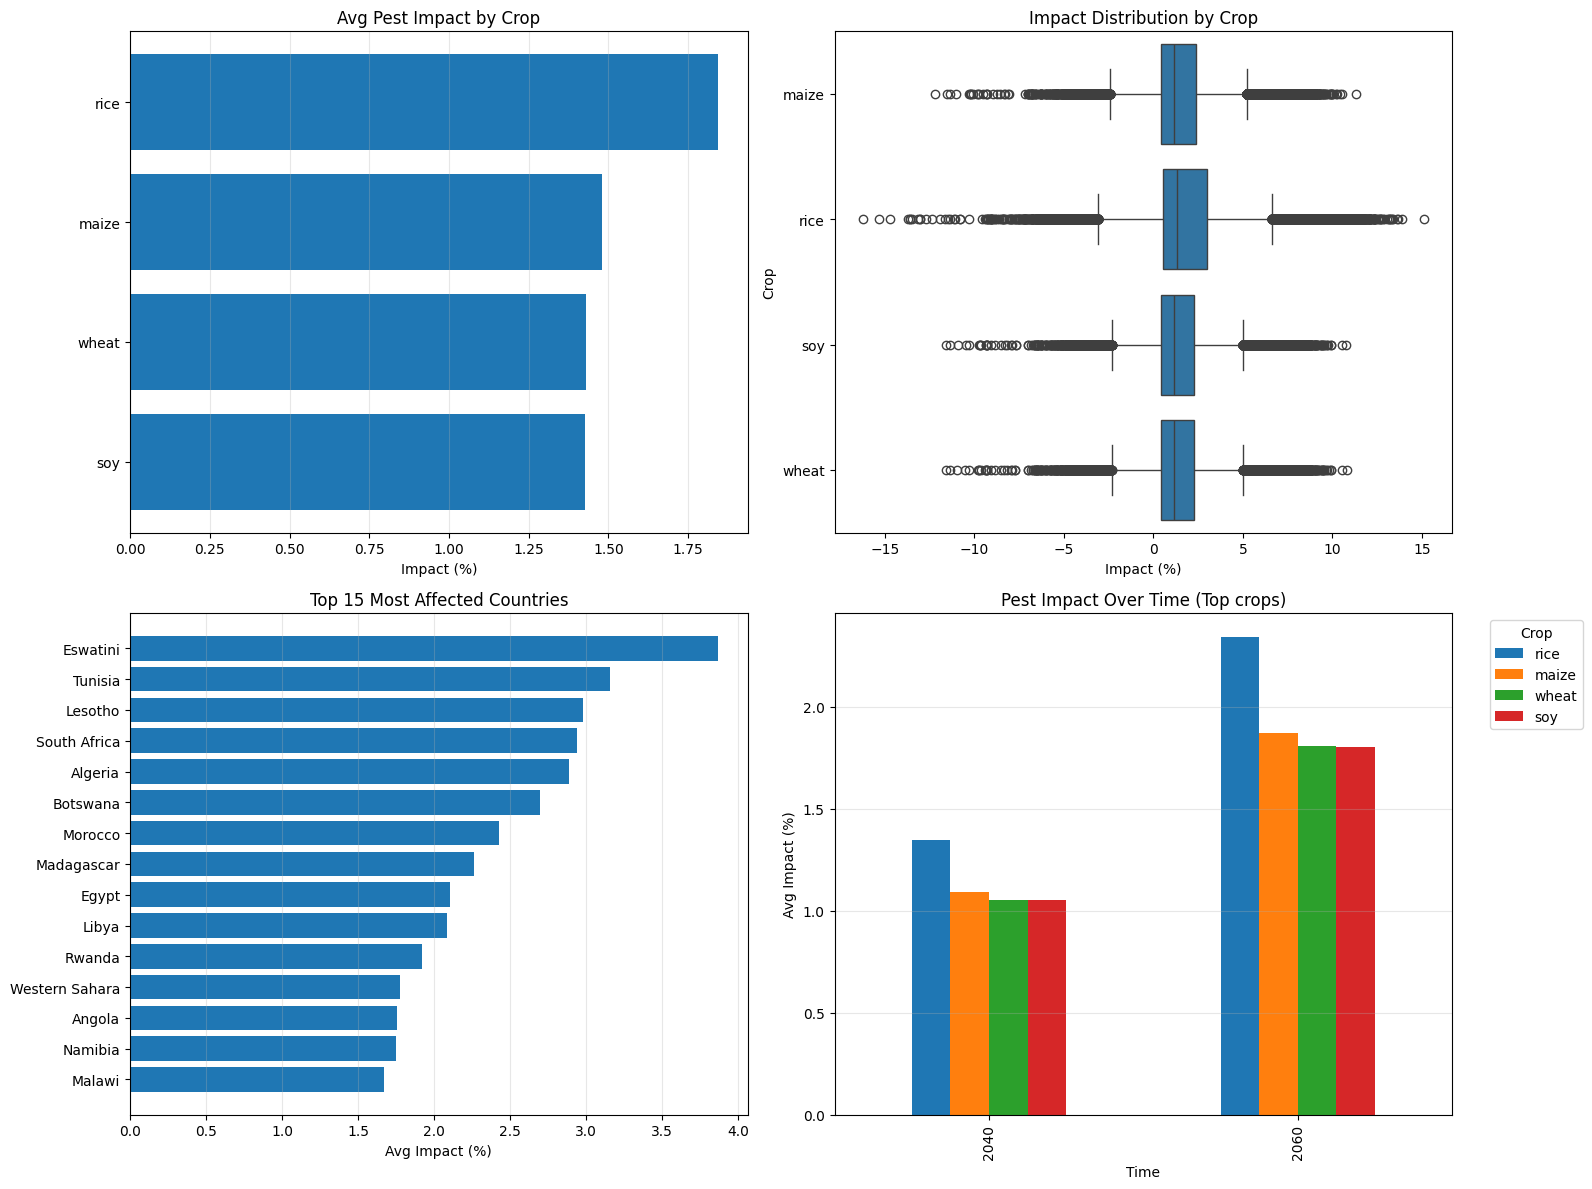

✓ Done


In [ ]:
# =============
# CELL 12: VISUALIZATION 1 - KEY CHARTS
# =============

print("\n--- Visualization: Crop & Country Vulnerability ---")

# Prepare summary stats if not already present
if 'crops_impact' not in globals():
    crops_impact = pest_data.groupby('crop')['value'].agg([
        ('avg_impact', 'mean'),
        ('max_impact', 'max'),
        ('min_impact', 'min'),
        ('records', 'count')
    ]).sort_values('avg_impact', ascending=False)

if 'country_impact' not in globals():
    country_impact = pest_data.groupby('admin0_name')['value'].agg([
        ('avg_impact', 'mean'),
        ('max_impact', 'max')
    ]).sort_values('avg_impact', ascending=False)

# Create a 2x2 figure
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Avg impact by crop (horizontal bar)
crops_sorted = crops_impact['avg_impact'].sort_values()
axes[0, 0].barh(crops_sorted.index, crops_sorted.values)
axes[0, 0].set_title('Avg Pest Impact by Crop')
axes[0, 0].set_xlabel('Impact (%)')
axes[0, 0].grid(axis='x', alpha=0.3)

# Plot 2: Impact distribution (boxplot)
# Use seaborn boxplot for cleaner visuals
sns.boxplot(data=pest_data, x='value', y='crop', ax=axes[0, 1], orient='h')
axes[0, 1].set_title('Impact Distribution by Crop')
axes[0, 1].set_xlabel('Impact (%)')
axes[0, 1].set_ylabel('Crop')

# Plot 3: Top 15 affected countries (horizontal bar)
top15_countries = country_impact.head(15)['avg_impact'].sort_values()
axes[1, 0].barh(top15_countries.index, top15_countries.values)
axes[1, 0].set_title('Top 15 Most Affected Countries')
axes[1, 0].set_xlabel('Avg Impact (%)')
axes[1, 0].grid(axis='x', alpha=0.3)

# Plot 4: Impact over time (grouped bars by crop)
# Build pivot (time x crop) to plot grouped bars; limit number of crops for readability
time_impact_pivot = pest_data.groupby(['time', 'crop'])['value'].mean().unstack(fill_value=0)

# If many crops exist, show the top 8 by overall mean impact
mean_by_crop = time_impact_pivot.mean().sort_values(ascending=False)
top_crops_for_time = mean_by_crop.head(8).index.tolist()
time_impact_pivot[top_crops_for_time].plot(kind='bar', ax=axes[1, 1])
axes[1, 1].set_title('Pest Impact Over Time (Top crops)')
axes[1, 1].set_xlabel('Time')
axes[1, 1].set_ylabel('Avg Impact (%)')
axes[1, 1].legend(title='Crop', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("✓ Done")


## **Cell 13 — Heatmap: Top 20 Countries vs Crops**

This cell builds a heatmap showing average pest-driven crop impact (%) with countries as rows and crops as columns. To keep the plot readable, we focus on the top 20 countries by mean impact. The heatmap uses annotations to show values and a perceptually-appropriate color map to highlight hotspots.

Use this visualization to quickly spot which crops drive national-level risk and where cross-crop vulnerabilities cluster geographically.


--- Visualization: Heatmap (Top 20 Countries vs Crops) ---


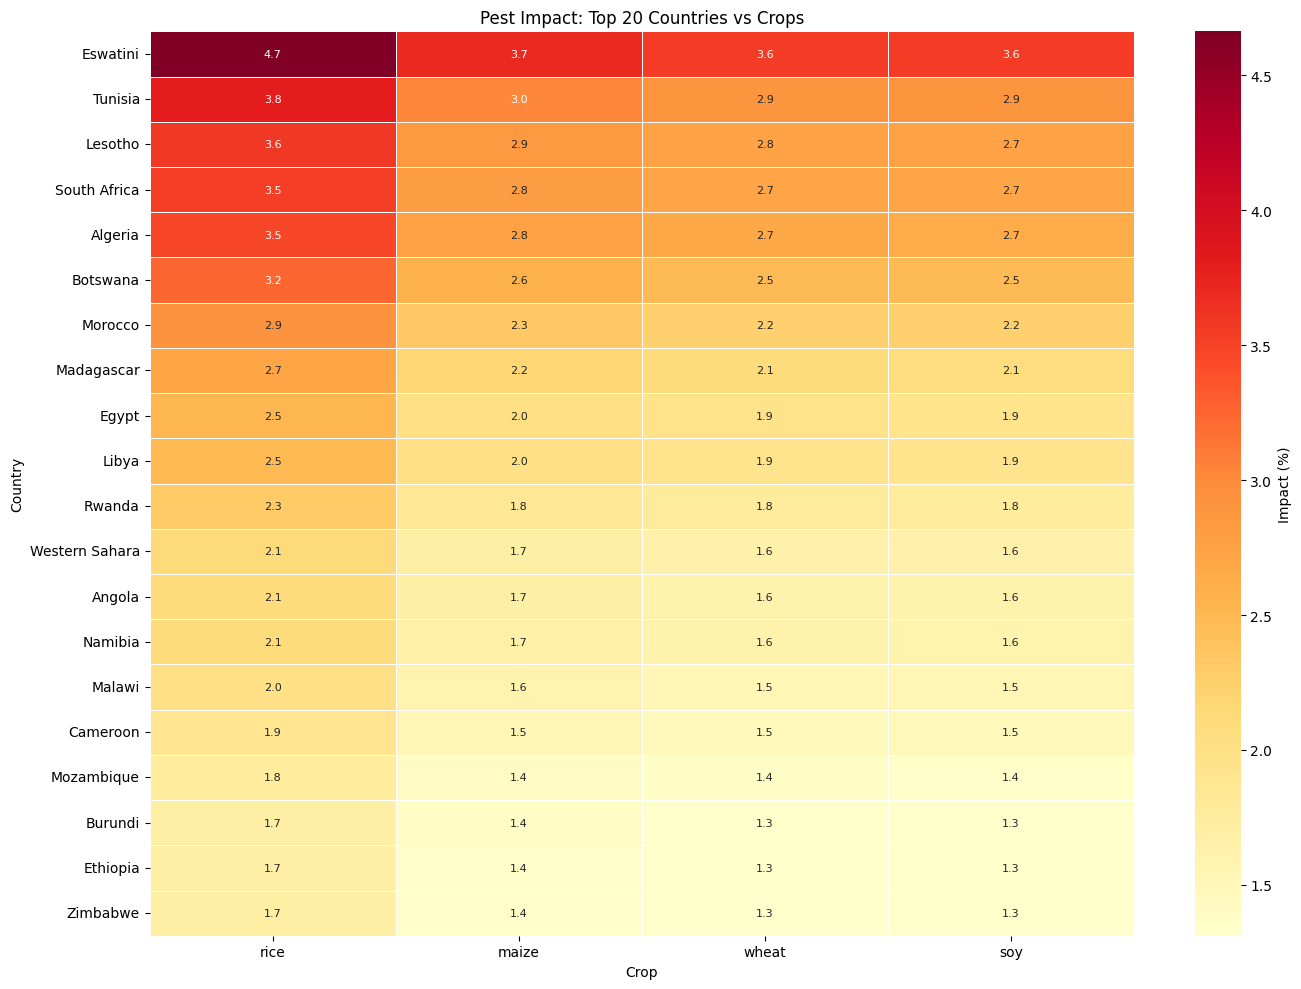

✓ Done


In [ ]:
# =============
# CELL 13: HEATMAP - COUNTRY vs CROP
# =============

print("\n--- Visualization: Heatmap (Top 20 Countries vs Crops) ---")

# Compute country × crop mean impact pivot
heatmap_data = pest_data.groupby(['admin0_name', 'crop'])['value'].mean().unstack(fill_value=0)

# Select top 20 countries by overall mean impact
top_countries = pest_data.groupby('admin0_name')['value'].mean().sort_values(ascending=False).head(20).index
heatmap_subset = heatmap_data.loc[top_countries]

# Optional: reorder crops by overall mean impact for clearer structure
crop_order = heatmap_subset.mean().sort_values(ascending=False).index
heatmap_subset = heatmap_subset[crop_order]

# Plot heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(heatmap_subset, annot=True, fmt='.1f', cmap='YlOrRd',
            cbar_kws={'label': 'Impact (%)'}, linewidths=0.4, annot_kws={"size":8})

plt.title('Pest Impact: Top 20 Countries vs Crops')
plt.xlabel('Crop')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

print("✓ Done")


## **Cell 14 — Final Summary: Key Findings & Data Coverage**

This closing cell synthesizes the main results from the analysis: the most and least vulnerable crops, the country most affected, the highest-risk country–crop pair, and notable time-based changes (e.g., largest increase by 2060). It also reports dataset coverage (countries, records, models, crops) so readers understand the analysis scope.

Use this cell to copy into presentations or executive summaries — the printed values are ready to paste into reports

In [ ]:
# =============
# CELL 14: FINAL SUMMARY
# =============

print("\n--- FINAL ANSWER: Climate-Driven Pest & Disease Vulnerability ---")

# Ensure required summary variables exist (compute if missing)
if 'crops_impact' not in globals():
    crops_impact = pest_data.groupby('crop')['value'].agg([
        ('avg_impact', 'mean'),
        ('max_impact', 'max'),
        ('min_impact', 'min'),
        ('records', 'count')
    ]).sort_values('avg_impact', ascending=False)

if 'country_impact' not in globals():
    country_impact = pest_data.groupby('admin0_name')['value'].agg([
        ('avg_impact', 'mean'),
        ('max_impact', 'max')
    ]).sort_values('avg_impact', ascending=False)

if 'country_crop' not in globals():
    country_crop = pest_data.groupby(['admin0_name', 'crop'])['value'].mean().reset_index().sort_values('value', ascending=False)

# Key results (guarded access)
most_vulnerable_crop = crops_impact.index[0] if len(crops_impact) > 0 else 'N/A'
least_vulnerable_crop = crops_impact.index[-1] if len(crops_impact) > 0 else 'N/A'
most_vulnerable_country = country_impact.index[0] if len(country_impact) > 0 else 'N/A'
most_vulnerable_combo = country_crop.iloc[0] if len(country_crop) > 0 else {'admin0_name':'N/A','crop':'N/A','value':0.0}

print(f"\n📌 Most Vulnerable Crop: {most_vulnerable_crop} "
      f"({crops_impact.loc[most_vulnerable_crop, 'avg_impact']:.2f}% avg impact)" if most_vulnerable_crop != 'N/A' else "\n📌 Most Vulnerable Crop: N/A")

print(f"📌 Least Vulnerable Crop: {least_vulnerable_crop} "
      f"({crops_impact.loc[least_vulnerable_crop, 'avg_impact']:.2f}% avg impact)" if least_vulnerable_crop != 'N/A' else "📌 Least Vulnerable Crop: N/A")

print(f"\n🌍 Most Affected Country: {most_vulnerable_country} "
      f"({country_impact.loc[most_vulnerable_country, 'avg_impact']:.2f}%)" if most_vulnerable_country != 'N/A' else "\n🌍 Most Affected Country: N/A")

print(f"⚠️  Highest Risk Combo: {most_vulnerable_combo['admin0_name']} - {most_vulnerable_combo['crop']} "
      f"({most_vulnerable_combo['value']:.2f}%)")

# Time-based changes (if time pivot exists)
if 'time_impact' in globals():
    # rebuild pivot if needed
    time_impact_local = time_impact.copy()
    time_pivot_local = time_impact_local.pivot(index='crop', columns='time', values='value')
    if '2060' in time_pivot_local.columns and '2040' in time_pivot_local.columns:
        time_pivot_local['change_2060_minus_2040'] = time_pivot_local['2060'] - time_pivot_local['2040']
        worst_increase = time_pivot_local['change_2060_minus_2040'].idxmax()
        print(f"\n📈 Biggest Increase by 2060: {worst_increase} "
              f"(+{time_pivot_local.loc[worst_increase, 'change_2060_minus_2040']:.2f}%)")
else:
    # Try to compute quick check from pest_data if possible
    try:
        pest_data['time'] = pest_data['time'].astype(str)
        tp = pest_data.groupby(['time', 'crop'])['value'].mean().unstack()
        if '2060' in tp.columns and '2040' in tp.columns:
            change = tp['2060'] - tp['2040']
            worst_increase = change.idxmax()
            print(f"\n📈 Biggest Increase by 2060: {worst_increase} (+{change.max():.2f}%)")
    except Exception:
        pass

# Data coverage
print(f"\n📊 Data Coverage:")
print(f" - Countries: {pest_data['admin0_name'].nunique() if 'admin0_name' in pest_data.columns else 'N/A'}")
print(f" - Records: {len(pest_data) if 'pest_data' in globals() else 'N/A'}")
print(f" - Models: {pest_data['model'].nunique() if 'model' in pest_data.columns else 'N/A'}")
print(f" - Crops: {pest_data['crop'].nunique() if 'crop' in pest_data.columns else 'N/A'}")

print("\n✓ Analysis Complete")



--- FINAL ANSWER: Climate-Driven Pest & Disease Vulnerability ---

📌 Most Vulnerable Crop: rice (1.84% avg impact)
📌 Least Vulnerable Crop: soy (1.43% avg impact)

🌍 Most Affected Country: Eswatini (3.87%)
⚠️  Highest Risk Combo: Eswatini - rice (4.66%)

📈 Biggest Increase by 2060: rice (+0.99%)

📊 Data Coverage:
 - Countries: 55
 - Records: 833728
 - Models: 7
 - Crops: 4

✓ Analysis Complete


## **Cell 15 — Load Pest Performance Dataset**

This cell loads the pest performance (TCP performance) dataset, which measures how climate change affects pest survival, reproduction, and spread across African countries. The dataset does not include crop-level detail, making it suitable for country-level trend analysis.

It prints:
- Dataset shape  
- Column names  
- Time periods available  
- Number of countries  
- Number of models  
- Total record count  


In [ ]:
# =============
# CELL 15: Load Pest Performance Data (No Crop/Pest)
# =============

import pandas as pd

pest_perf = pd.read_parquet(
    's3://digital-atlas/domain=impacts/type=pest-disease/source=rohr_notre-dame/region=africa/processing=aggregated/pest-tcp-perf_pct.parquet'
)

print("✅ Pest Performance Dataset Loaded")
print("Shape:", pest_perf.shape)
print("\n📌 Available Columns:")
print(pest_perf.columns.tolist())
print("\n🕒 Time Periods:", pest_perf['time'].unique())
print("🌍 Countries:", pest_perf['admin0_name'].nunique())
print("📊 Models:", pest_perf['model'].unique())
print("🔢 Records:", len(pest_perf))


✅ Pest Performance Dataset Loaded
Shape: (208432, 13)

📌 Available Columns:
['admin0_name', 'admin1_name', 'admin2_name', 'iso3', 'model', 'scenario', 'time', 'value', 'domain', 'type', 'source', 'region', 'processing']

🕒 Time Periods: ['2040' '2060']
🌍 Countries: 55
📊 Models: ['ACCESS-ESM0-5' 'EC-Earth2' 'INM-CM4-0' 'MPI-ESM0-2-HR' 'MRI-ESM1-0'
 'ENSEMBLEmean' 'ENSEMBLEsd']
🔢 Records: 208432


## **Cell 16 — Pest Performance Change Over Time (2040 vs 2060)**

This cell analyzes how pest performance changes between the years 2040 and 2060. It includes:

- **Grouping data by country and time** to compute average pest performance values.
- **Pivoting the table** to create a side-by-side comparison of 2040 vs 2060 for each country.
- **Filtering** to include only countries that have data for both years.
- **Calculating the change** in pest performance (2060 − 2040).
- **Sorting results** to identify the countries with the largest increase and decrease in pest pressure.
- **Printing the top 10 increases and top 10 decreases** to highlight regional trends.



In [ ]:
# =============
# CELL 16: Pest Performance Change Over Time (2040 vs 2060)
# =============

print("\n--- Pest Performance Change: 2040 vs 2060 ---")

# Group by country & time, get average value
country_trend = pest_perf.groupby(['admin0_name', 'time'])['value'].mean().reset_index()

# Pivot to compare 2040 vs 2060
country_pivot = country_trend.pivot(index='admin0_name', columns='time', values='value')

# Keep only countries with both years
country_pivot = country_pivot.dropna(subset=['2040', '2060'])

# Add change column
country_pivot['change'] = country_pivot['2060'] - country_pivot['2040']

# Sort by change
country_pivot = country_pivot.sort_values('change', ascending=False)

print("\n🌍 Countries with Increasing Pest Performance:")
print(country_pivot.head(10).round(2))

print("\n🌍 Countries with Decreasing Pest Performance:")
print(country_pivot.tail(10).round(2))



--- Pest Performance Change: 2040 vs 2060 ---

🌍 Countries with Increasing Pest Performance:
time          2040  2060  change
admin0_name                     
Lesotho       0.95  1.01    0.06
Algeria       0.95  1.00    0.05
South Africa  0.96  1.00    0.05
Morocco       0.93  0.98    0.05
Tunisia       0.97  1.01    0.04
Botswana      0.95  0.99    0.04
Zimbabwe      0.90  0.94    0.04
Namibia       0.91  0.95    0.04
Rwanda        0.92  0.96    0.04
Eswatini      1.00  1.04    0.04

🌍 Countries with Decreasing Pest Performance:
time                   2040  2060  change
admin0_name                              
Guinea-Bissau          0.84  0.87    0.02
Senegal                0.86  0.88    0.02
Ghana                  0.86  0.89    0.02
Benin                  0.86  0.89    0.02
Comoros                0.77  0.79    0.02
Burkina Faso           0.84  0.86    0.02
Djibouti               0.86  0.88    0.02
Sao Tome And Principe  0.79  0.81    0.02
South Sudan            0.85  0.87    0.02
C

## **Cell 17 — Pest Performance Trend Across Africa**

This cell calculates and visualizes the Africa-wide average pest performance over time. It includes:

- **Grouping the dataset by time** to compute the continent-level mean pest performance.
- **Creating a time-series table** showing how pest pressure changes across available years.
- **Plotting a line graph** to illustrate the upward or downward trend in pest performance.
- **Using seaborn styling** to produce a clear and readable chart.
- **Highlighting climate-driven changes** that affect pest survival and activity across Africa.



C:\Users\Neel Arora\AppData\Local\Temp\ipykernel_22944\287067913.py:18: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  plt.tight_layout()
a:\my_codes\my_project\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


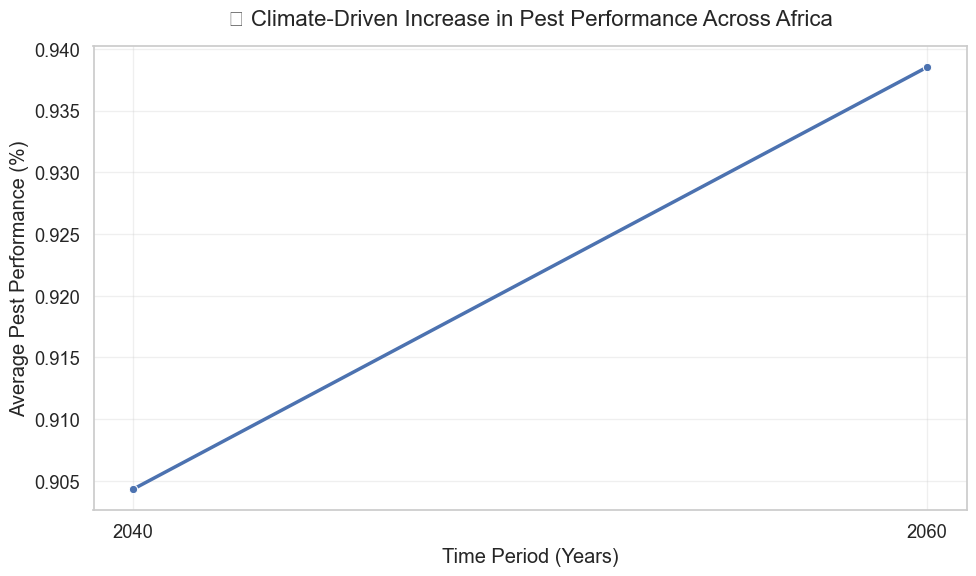

In [ ]:
# =============
# CELL 17: Pest Performance Trend Across Africa
# =============

import seaborn as sns
sns.set(style="whitegrid", font_scale=1.2)

# Africa-wide average over time
africa_trend = pest_perf.groupby('time')['value'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=africa_trend, x='time', y='value', marker='o', linewidth=2.5)

plt.title("📈 Climate-Driven Increase in Pest Performance Across Africa", pad=15, fontsize=16)
plt.xlabel("Time Period (Years)")
plt.ylabel("Average Pest Performance (%)")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


## **Cell 18 — Top 10 Countries with Highest Pest Increase (2040 → 2060)**

This cell identifies the countries that are expected to experience the largest increase in pest performance between 2040 and 2060. It includes:

- **Sorting the country-level change values** computed earlier in descending order.
- **Selecting the top 10 countries** showing the greatest increase in pest pressure.
- **Creating a horizontal bar chart** to visualize the magnitude of change for each country.
- **Adding labels to each bar** to display exact percentage increases.
- **Highlighting countries that may need priority attention** for pest management and climate adaptation.


C:\Users\Neel Arora\AppData\Local\Temp\ipykernel_22944\1227751136.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_increase['change'], y=top_increase.index, orient='h', palette="Reds")
C:\Users\Neel Arora\AppData\Local\Temp\ipykernel_22944\1227751136.py:19: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Neel Arora\AppData\Local\Temp\ipykernel_22944\1227751136.py:19: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()
a:\my_codes\my_project\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


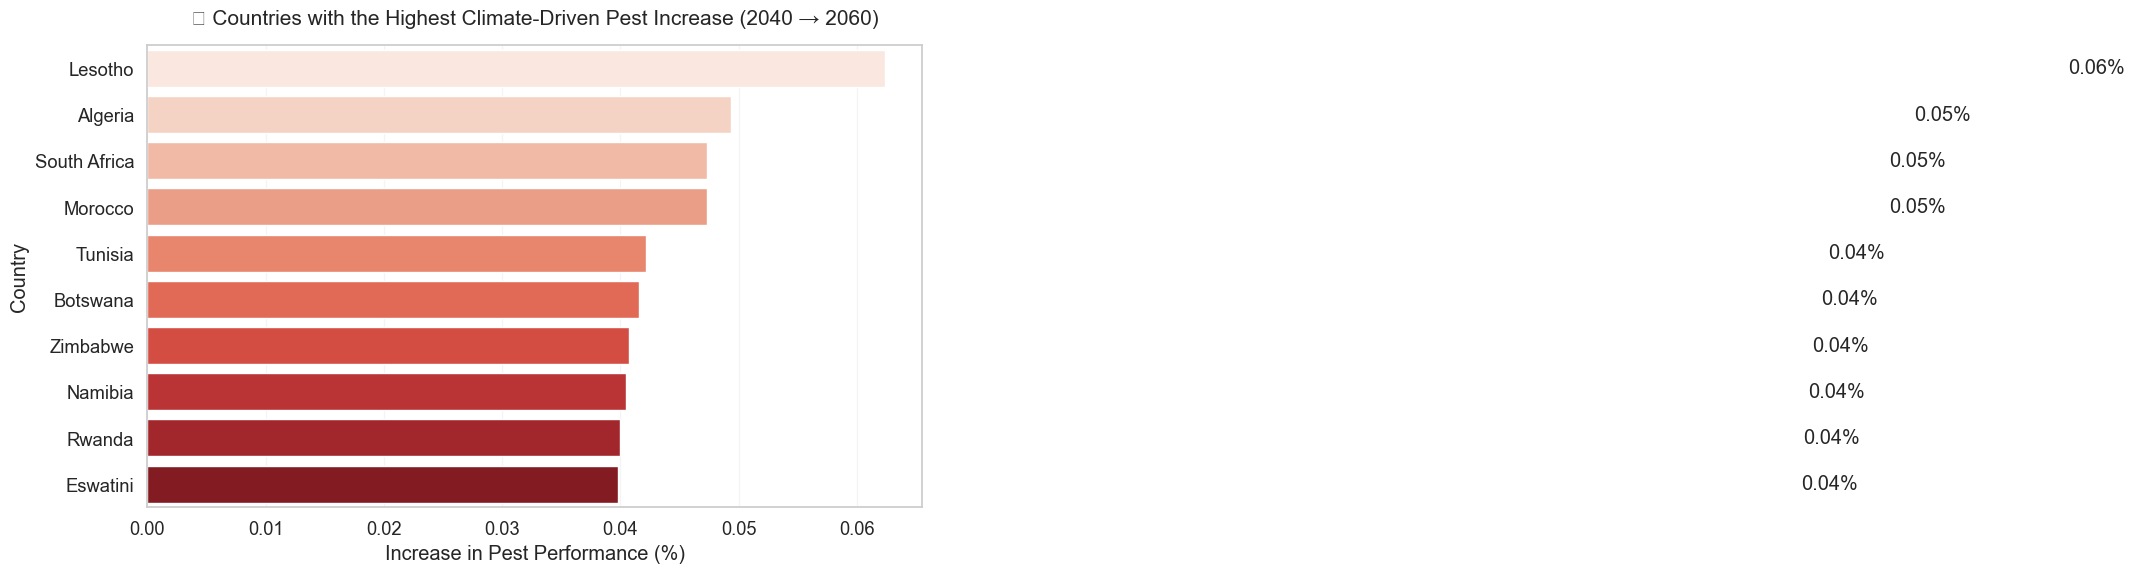

In [ ]:
# =============
# CELL 18: Top 10 Countries with Highest Pest Increase (2040–2060)
# =============

top_increase = country_pivot.sort_values('change', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_increase['change'], y=top_increase.index, orient='h', palette="Reds")

plt.title("🌍 Countries with the Highest Climate-Driven Pest Increase (2040 → 2060)", fontsize=15, pad=15)
plt.xlabel("Increase in Pest Performance (%)")
plt.ylabel("Country")
plt.grid(axis='x', alpha=0.2)

# Add value labels
for i, v in enumerate(top_increase['change']):
    plt.text(v + 0.1, i, f"{v:.2f}%", va='center')

plt.tight_layout()
plt.show()


## **Cell 19 — Climate Model Agreement on Pest Performance**

This cell evaluates how different climate models project pest performance over time. It includes:

- **Grouping data by climate model and time** to calculate average pest performance for each model.
- **Creating a multi-line plot** where each line represents a different climate model.
- **Visual comparison of model trends** to check consistency or divergence across projections.
- **Identifying agreement** among models that pest performance generally increases under future climates.
- **Supporting uncertainty analysis** by showing how different climate models behave relative to each other.


C:\Users\Neel Arora\AppData\Local\Temp\ipykernel_22944\1613009153.py:15: UserWarning: Glyph 129302 (\N{ROBOT FACE}) missing from font(s) Arial.
  plt.tight_layout()
a:\my_codes\my_project\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129302 (\N{ROBOT FACE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


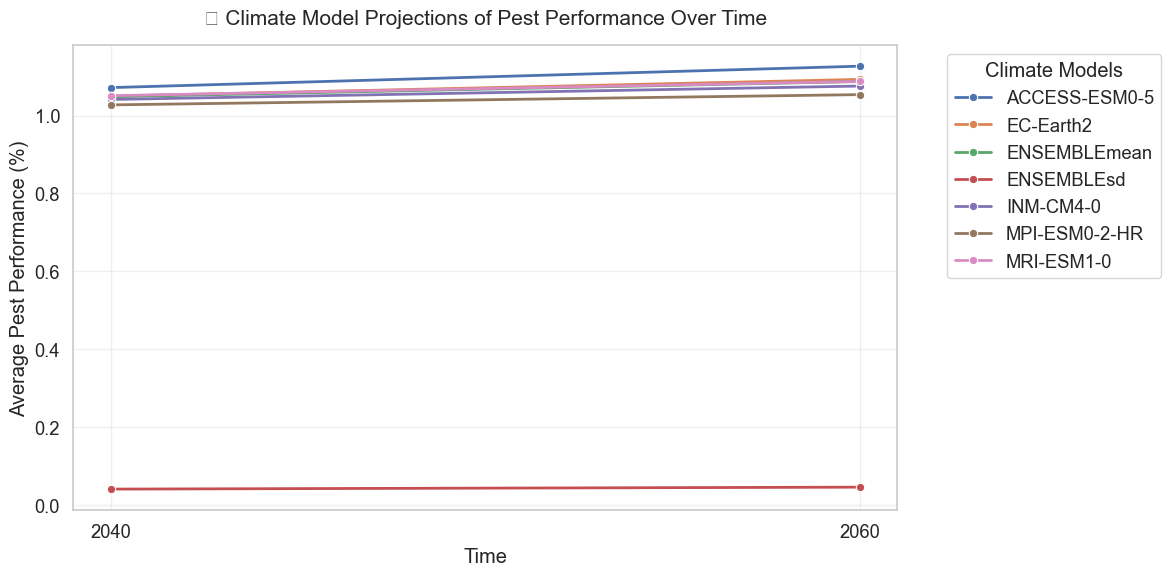

In [ ]:
# =============
# CELL 19: Climate Model Agreement on Pest Performance
# =============

model_trend = pest_perf.groupby(['model', 'time'])['value'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=model_trend, x='time', y='value', hue='model', marker='o', linewidth=2)

plt.title("🤖 Climate Model Projections of Pest Performance Over Time", fontsize=15, pad=15)
plt.xlabel("Time")
plt.ylabel("Average Pest Performance (%)")
plt.legend(title="Climate Models", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


## **Cell 20 — Final Answer: How Climate Change Affects Pests & Diseases**

This cell synthesizes the key answers about how climate change influences pests and diseases across Africa. It includes:

- **Computing continent-wide averages** for two target years (e.g., 2040 and 2060) to quantify overall change.
- **Identifying the country with the largest increase** in pest performance (2040 → 2060).
- **Summarizing model agreement** by checking if climate models show consistent trends.
- **Providing a concise conclusion** about the implications for pest survival, spread, and food security.
- **Printing data coverage metrics** (countries, records, models, crops) for context.


In [ ]:
# =============
# CELL 20: Final Summary – Answer to Q2
# =============

print("\n--- FINAL ANSWER: How Climate Change Affects Pests & Diseases ---\n")

# Guarded computation of africa_trend (build if missing)
try:
    africa_trend  # use existing if present
except NameError:
    africa_trend = pest_perf.groupby('time')['value'].mean().reset_index()

# Ensure time values are strings for safe indexing
africa_trend['time'] = africa_trend['time'].astype(str)
available_years = africa_trend['time'].tolist()
# Choose 2040 and 2060 if present, else use first and last available
start_year = '2040' if '2040' in available_years else africa_trend['time'].iloc[0]
end_year = '2060' if '2060' in available_years else africa_trend['time'].iloc[-1]

# Extract values (guarded)
try:
    africa_start = float(africa_trend[africa_trend['time'] == start_year]['value'])
except Exception:
    africa_start = float(africa_trend['value'].iloc[0])

try:
    africa_end = float(africa_trend[africa_trend['time'] == end_year]['value'])
except Exception:
    africa_end = float(africa_trend['value'].iloc[-1])

change_africa = africa_end - africa_start

print(f"📌 Africa-wide pest performance: {africa_start:.2f}% in {start_year} → {africa_end:.2f}% in {end_year} (change = {change_africa:.2f}%).\n")

# Country-level largest increase (require country_pivot computed earlier)
most_affected_country = 'N/A'
increase_value = None
try:
    # Expect country_pivot from Cell 16; if not available, build it
    country_pivot
except NameError:
    country_trend = pest_perf.groupby(['admin0_name', 'time'])['value'].mean().reset_index()
    country_pivot = country_trend.pivot(index='admin0_name', columns='time', values='value')
    if start_year in country_pivot.columns and end_year in country_pivot.columns:
        country_pivot = country_pivot.dropna(subset=[start_year, end_year])
        country_pivot['change'] = country_pivot[end_year] - country_pivot[start_year]

# Identify country with max increase if present
if 'change' in country_pivot.columns and len(country_pivot) > 0:
    most_affected_country = country_pivot['change'].idxmax()
    increase_value = country_pivot['change'].max()
    print(f"🌍 Country with highest increase: {most_affected_country} (+{increase_value:.2f}% by {end_year}).\n")
else:
    print("🌍 Country-level change not available (insufficient data for selected years).\n")

# Model agreement summary (quick diagnostic)
try:
    model_trend = pest_perf.groupby(['model', 'time'])['value'].mean().reset_index()
    # compute trend sign per model (end - start)
    mt_pivot = model_trend.pivot(index='model', columns='time', values='value')
    if start_year in mt_pivot.columns and end_year in mt_pivot.columns:
        mt_pivot['model_change'] = mt_pivot[end_year] - mt_pivot[start_year]
        up_models = (mt_pivot['model_change'] > 0).sum()
        total_models = len(mt_pivot)
        print(f"📊 Model agreement: {up_models}/{total_models} models predict an increase from {start_year} to {end_year}.\n")
    else:
        print("📊 Model agreement: insufficient years present to compute model agreement for chosen start/end.\n")
except Exception:
    print("📊 Model agreement: could not compute model-level summary (missing 'model' or incomplete data).\n")

# Main conclusion
print("✅ Conclusion:")
print("Climate change increases pest survival, reproduction, and spread in many African regions,")
print("raising pest-driven yield losses and threatening food security. Prioritize surveillance,")
print("integrated pest management, and climate-adaptive crop strategies in high-risk countries.\n")

# Data coverage
print("📊 Data Coverage:")
print(f" - Countries: {pest_perf['admin0_name'].nunique() if 'admin0_name' in pest_perf.columns else 'N/A'}")
print(f" - Records: {len(pest_perf) if 'pest_perf' in globals() else 'N/A'}")
print(f" - Models: {pest_perf['model'].nunique() if 'model' in pest_perf.columns else 'N/A'}")
print(f" - Crops: {pest_data['crop'].nunique() if 'pest_data' in globals() and 'crop' in pest_data.columns else 'N/A'}\n")

print("✓ Question 2 solved successfully.")



--- FINAL ANSWER: How Climate Change Affects Pests & Diseases ---

📌 Africa-wide pest performance: 0.90% in 2040 → 0.94% in 2060 (change = 0.03%).

🌍 Country with highest increase: Lesotho (+0.06% by 2060).

📊 Model agreement: 7/7 models predict an increase from 2040 to 2060.

✅ Conclusion:
Climate change increases pest survival, reproduction, and spread in many African regions,
raising pest-driven yield losses and threatening food security. Prioritize surveillance,
integrated pest management, and climate-adaptive crop strategies in high-risk countries.

📊 Data Coverage:
 - Countries: 55
 - Records: 208432
 - Models: 7
 - Crops: 4

✓ Question 2 solved successfully.


C:\Users\Neel Arora\AppData\Local\Temp\ipykernel_22944\1978185301.py:22: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  africa_start = float(africa_trend[africa_trend['time'] == start_year]['value'])
C:\Users\Neel Arora\AppData\Local\Temp\ipykernel_22944\1978185301.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  africa_end = float(africa_trend[africa_trend['time'] == end_year]['value'])


## **Cell 21 — Load pest-yield-impact (crop-level)**

This cell loads the crop-level pest yield impact dataset from S3 and provides a quick inspection. It includes:

- **Reading** the parquet file into `pest_yield`.  
- **Printing** the shape and column names.  
- **Displaying** the first few rows for a quick sanity check.  
- Keeping only relevant columns later in downstream cells (if needed).


In [ ]:
# =============
# CELL 21: Load pest-yield-impact (crop-level)
# =============

print("\n--- CELL 21: Load pest-yield-impact (crop-level) ---")

pest_yield = pd.read_parquet(
    's3://digital-atlas/domain=impacts/type=pest-disease/source=rohr_notre-dame/region=africa/processing=aggregated/pest-yield-impact_pct.parquet'
)

print("Loaded pest-yield-impact:", pest_yield.shape)
print("Columns:", pest_yield.columns.tolist())
print("\nSample rows:")
display(pest_yield.head())



--- CELL 21: Load pest-yield-impact (crop-level) ---
Loaded pest-yield-impact: (833728, 14)
Columns: ['admin0_name', 'admin1_name', 'admin2_name', 'iso3', 'model', 'scenario', 'time', 'crop', 'value', 'domain', 'type', 'source', 'region', 'processing']

Sample rows:


,admin0_name,admin1_name,admin2_name,iso3,model,scenario,time,crop,value,domain,type,source,region,processing
0,Somalia,None,None,SOM,ACCESS-ESM0-5,ssp245,2040,maize,0.599798,impacts,pest-disease,rohr_notre-dame,africa,aggregated
1,Somalia,None,None,SOM,ACCESS-ESM0-5,ssp245,2040,rice,0.800174,impacts,pest-disease,rohr_notre-dame,africa,aggregated
2,Somalia,None,None,SOM,ACCESS-ESM0-5,ssp245,2040,soy,0.570221,impacts,pest-disease,rohr_notre-dame,africa,aggregated
3,Somalia,None,None,SOM,ACCESS-ESM0-5,ssp245,2040,wheat,0.572086,impacts,pest-disease,rohr_notre-dame,africa,aggregated
4,Somalia,None,None,SOM,ACCESS-ESM0-5,ssp245,2060,maize,1.312567,impacts,pest-disease,rohr_notre-dame,africa,aggregated


## **Cell 22 — Inspect & Aggregate Pest Impacts by Country and Time**

This cell performs exploratory inspection and aggregation of the pest-yield-impact dataset. It includes:

- **Checking the available time periods** in the dataset.  
- **Aggregating average pest impact by country and time** to observe national trends.  
- **Aggregating by country, crop, and time** to identify detailed crop-level vulnerabilities.  
- **Displaying sample results** for quick verification before deeper analysis.


In [ ]:
# =============
# CELL 22: Inspect and aggregate pest impacts by country and time
# =============

print("\n--- CELL 22: Inspect & aggregate ---")

# Check unique times
print("Unique times:", sorted(pest_yield['time'].unique()))

# Aggregate average percentage impact by country and time (all crops)
country_time = pest_yield.groupby(['admin0_name', 'time'])['value'].mean().reset_index()
print("\nCountry × time (sample):")
display(country_time.head())

# Aggregate crop-level severity by country and time
crop_country = pest_yield.groupby(['admin0_name', 'crop', 'time'])['value'].mean().reset_index()
print("\nCrop-country × time (sample):")
display(crop_country.head())



--- CELL 22: Inspect & aggregate ---
Unique times: ['2040', '2060']

Country × time (sample):


,admin0_name,time,value
0,Algeria,2040,2.293185
1,Algeria,2060,3.479259
2,Angola,2040,1.341864
3,Angola,2060,2.168304
4,Benin,2040,0.180482



Crop-country × time (sample):


,admin0_name,crop,time,value
0,Algeria,maize,2040,2.193379
1,Algeria,maize,2060,3.325486
2,Algeria,rice,2040,2.752437
3,Algeria,rice,2060,4.186845
4,Algeria,soy,2040,2.110859


## **Cell 23 — Compute Change in Pest Impact (2040 → 2060)**

This cell quantifies how pest-driven crop impacts change over time for each country. It includes:

- **Extracting available years** from the dataset.  
- **Selecting the earliest and latest years** (commonly 2040 and 2060).  
- **Pivoting the country-time table** to align values side by side.  
- **Dropping incomplete rows** where either year is missing.  
- **Computing the change** in pest impact (latest year − earliest year).  
- **Sorting results** to show the countries with the greatest increase in pest-driven crop losses.

This helps identify emerging national hotspots under climate change.


In [ ]:
# =============
# CELL 23: Compute change (2040 -> 2060)
# =============

print("\n--- CELL 23: Compute change (2040 -> 2060) ---")

# Detect available years
years = sorted(country_time['time'].unique())
print("Detected years:", years)

# Select start and end years
start_year, end_year = years[0], years[-1]
print(f"Using {start_year} → {end_year} for change calculation")

# Pivot country_time
country_pivot = country_time.pivot(index='admin0_name', columns='time', values='value')

# Drop rows missing either year
country_pivot = country_pivot.dropna(subset=[start_year, end_year])

# Compute change
country_pivot['impact_change'] = country_pivot[end_year] - country_pivot[start_year]

# Sort countries by largest increase
country_pivot = country_pivot.sort_values('impact_change', ascending=False)

print("\nTop 10 countries (largest increase in pest-driven crop impact):")
display(country_pivot[['impact_change']].head(10).round(3))



--- CELL 23: Compute change (2040 -> 2060) ---
Detected years: ['2040', '2060']
Using 2040 → 2060 for change calculation

Top 10 countries (largest increase in pest-driven crop impact):


time,impact_change
admin0_name,
Lesotho,1.496
Algeria,1.186
South Africa,1.138
Morocco,1.136
Tunisia,1.015
Botswana,0.999
Zimbabwe,0.977
Namibia,0.970
Eswatini,0.960


## **Cell 24 — Load Pest Yield Impact Data for Emerging Risk Analysis**

This cell reloads (or reuses) the pest-yield-impact dataset specifically for emerging risk and trend analysis. It includes:

- **Loading** the crop-level pest yield impact dataset from S3.  
- **Confirming** dataset shape and available time periods.  
- **Keeping only key columns** required for downstream calculations (country, crop, time, value).  
- Preparing the dataset for change analysis and scenario comparisons in later cells.


In [ ]:
# =============
# CELL 24: Load Pest Yield Impact Data (for Emerging Risk Analysis)
# =============

import pandas as pd

print("\n--- Loading Pest Yield Impact Data (for Emerging Risk Analysis) ---")

pest_trend = pd.read_parquet(
    's3://digital-atlas/domain=impacts/type=pest-disease/source=rohr_notre-dame/region=africa/processing=aggregated/pest-yield-impact_pct.parquet'
)

print(f"✅ Loaded Successfully | Shape: {pest_trend.shape}")
print("Available Time Periods:", pest_trend['time'].unique())

# Keep only the necessary columns
pest_trend = pest_trend[['admin0_name', 'crop', 'time', 'value']]

pest_trend.head()



--- Loading Pest Yield Impact Data (for Emerging Risk Analysis) ---
✅ Loaded Successfully | Shape: (833728, 14)
Available Time Periods: ['2040' '2060']


,admin0_name,crop,time,value
0,Somalia,maize,2040,0.599798
1,Somalia,rice,2040,0.800174
2,Somalia,soy,2040,0.570221
3,Somalia,wheat,2040,0.572086
4,Somalia,maize,2060,1.312567


## **Cell 25 — Calculate Change in Pest Pressure (2040 → 2060)**

This cell computes the change in pest-driven crop impact between two time periods (typically 2040 → 2060). It includes:

- **Pivoting the data** so each country–crop pair has columns for each year.  
- **Dropping rows** that do not have both the start and end year present.  
- **Calculating the change** as `value_2060 - value_2040`.  
- **Sorting results** to identify the highest increases (emerging risks).  
- **Displaying the top 10** country–crop pairs with the largest increases.


In [ ]:
# =============
# CELL 25: Calculate change in pest pressure (2040 -> 2060)
# =============

print("\n--- Calculating Pest Increase from 2040 to 2060 ---")

# Ensure time is string-typed for consistent pivoting
pest_trend['time'] = pest_trend['time'].astype(str)

# Pivot so rows = (country, crop), columns = time
pest_change = pest_trend.pivot_table(
    index=['admin0_name', 'crop'],
    columns='time',
    values='value'
).reset_index()

# Identify available years and choose default 2040 -> 2060 if present
years = [c for c in pest_change.columns if isinstance(c, str) and c.isdigit()]
years = sorted(years)
start_year = '2040' if '2040' in years else (years[0] if years else None)
end_year = '2060' if '2060' in years else (years[-1] if years else None)

if start_year is None or end_year is None:
    raise ValueError("No numeric time columns detected in pivoted table.")

print(f"Using years: {start_year} -> {end_year} for change calculation")

# Drop rows missing either year
pest_change = pest_change.dropna(subset=[start_year, end_year])

# Calculate change
pest_change['change'] = pest_change[end_year] - pest_change[start_year]

# Sort by highest increase
emerging_risk = pest_change.sort_values('change', ascending=False)

print("\nTop 10 Emerging Risk Country–Crop Combinations:")
print(emerging_risk.head(10).to_string(index=False))



--- Calculating Pest Increase from 2040 to 2060 ---
Using years: 2040 -> 2060 for change calculation

Top 10 Emerging Risk Country–Crop Combinations:
 admin0_name  crop     2040     2060   change
     Lesotho  rice 2.676254 4.486416 1.810162
     Algeria  rice 2.752437 4.186845 1.434408
     Lesotho maize 2.137019 3.565173 1.428154
South Africa  rice 2.847840 4.225010 1.377170
     Lesotho wheat 2.062444 3.437767 1.375323
     Morocco  rice 2.223485 3.598280 1.374795
     Lesotho   soy 2.057424 3.429192 1.371768
     Tunisia  rice 3.186074 4.413635 1.227561
    Botswana  rice 2.633766 3.840726 1.206960
    Zimbabwe  rice 1.099418 2.280874 1.181457


## **Cell 26 — Aggregate by Country to Find Emerging National Hotspots**

This cell aggregates country–crop change scores to identify national hotspots of emerging pest risk. It includes:

- **Grouping emerging-risk results by country** to compute the mean change in pest impact.
- **Sorting countries** by their average increase (highest to lowest).
- **Printing the top countries** to highlight where national-level adaptation and surveillance are most needed.
- Optionally, these results can be used to map or further visualize national priorities.


In [ ]:
# =============
# CELL 26: Aggregate by country to find emerging national hotspots
# =============

# Aggregate the change values by country (mean change across crops)
country_risk = emerging_risk.groupby('admin0_name')['change'].mean().sort_values(ascending=False)

print("\n🌍 Countries with the Highest Expected Increase in Pest Pressure (2040 → 2060):")
print(country_risk.head(10))



🌍 Countries with the Highest Expected Increase in Pest Pressure (2040 → 2060):
admin0_name
Lesotho         1.496352
Algeria         1.186075
South Africa    1.138337
Morocco         1.135787
Tunisia         1.014674
Botswana        0.998967
Zimbabwe        0.976601
Namibia         0.970260
Eswatini        0.959935
Rwanda          0.958922
Name: change, dtype: float64


## **Cell 27 — Visualization: Top 10 Emerging Pest Risk Countries**

This cell visualizes the countries projected to have the largest increase in pest-driven crop impact between 2040 and 2060. It includes:

- Selecting the **top 10 countries** with the highest increase in pest pressure.  
- Creating a **bar chart** to display their average increase values.  
- Adding **gridlines** and **labels** for readability.  
- Annotating each bar with the exact percentage increase.  

This visualization highlights priority regions for pest management and climate adaptation investments.


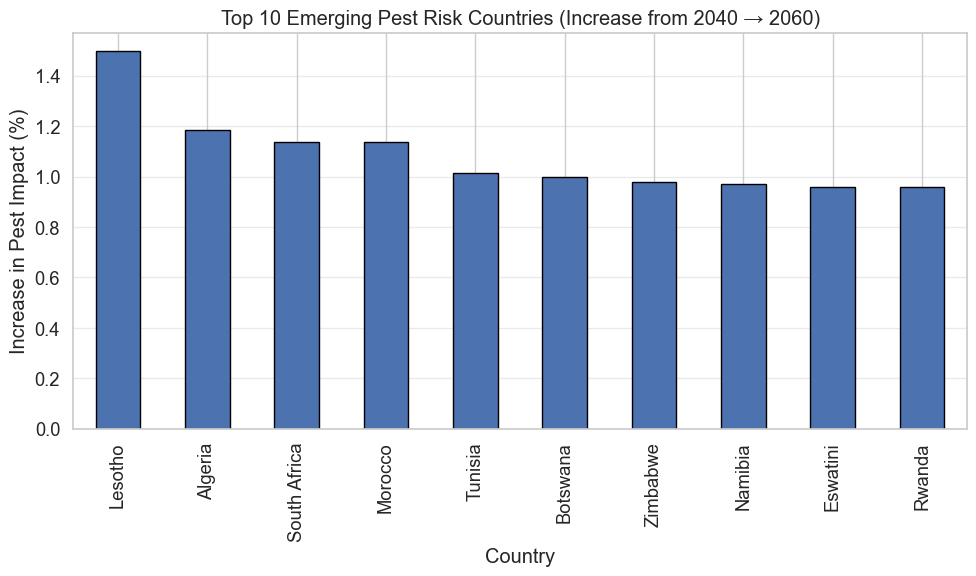

In [ ]:
# =============
# CELL 27: Visualization – Top 10 Emerging Pest Risk Countries
# =============

top10_countries = country_risk.head(10)

plt.figure(figsize=(10, 6))
top10_countries.plot(kind='bar', edgecolor='black')
plt.title("Top 10 Emerging Pest Risk Countries (Increase from 2040 → 2060)")
plt.xlabel("Country")
plt.ylabel("Increase in Pest Impact (%)")
plt.grid(axis='y', alpha=0.4)
plt.tight_layout()
plt.show()


## **Cell 28 — Final Insights and Interpretation for Emerging Pest Risks**

This cell provides a concise interpretation of the emerging pest risk results. It includes:

- Listing the **top countries** with the highest projected increase in pest pressure.  
- Highlighting the **most at-risk country–crop combination**.  
- Outlining key **recommendations** for adaptation and mitigation.  
- Emphasizing the need for **monitoring, early warning systems, IPM**, and resilient crop varieties.  

This summary translates the analytical results into actionable insights.


In [ ]:
# =============
# CELL 28: Final Insights and Interpretation for Q3
# =============

print("\n✅ FINAL INSIGHT FOR QUESTION 3:")

print("\n🌍 Countries showing emerging risks (highest pest pressure growth):")
print(country_risk.head(5))

print("\n⚠️ These regions will likely need:")
print(" - Increased surveillance & pest monitoring systems")
print(" - Early warning systems for outbreaks")
print(" - Stronger Integrated Pest Management (IPM) strategies")
print(" - Crop diversification & resilient crop varieties")

top_country = country_risk.index[0]
print(f"\n🚨 Highest Emerging Risk Country: {top_country}")

top_pair = emerging_risk.iloc[0]
print(f"🌾 Most At-Risk Crop–Country Pair: {top_pair['admin0_name']} - {top_pair['crop']} (+{top_pair['change']:.2f}%)")



✅ FINAL INSIGHT FOR QUESTION 3:

🌍 Countries showing emerging risks (highest pest pressure growth):
admin0_name
Lesotho         1.496352
Algeria         1.186075
South Africa    1.138337
Morocco         1.135787
Tunisia         1.014674
Name: change, dtype: float64

⚠️ These regions will likely need:
 - Increased surveillance & pest monitoring systems
 - Early warning systems for outbreaks
 - Stronger Integrated Pest Management (IPM) strategies
 - Crop diversification & resilient crop varieties

🚨 Highest Emerging Risk Country: Lesotho
🌾 Most At-Risk Crop–Country Pair: Lesotho - rice (+1.81%)


## **Cell 29 — Load pest-yield-impact and Inspect Scenario Information**

This cell reloads (or reuses) the pest-yield-impact dataset and inspects scenario information. It includes:

- **Reusing the existing dataset** if already loaded, otherwise loading it from S3.  
- **Printing the dataset shape and column names** for verification.  
- **Checking whether a `scenario` column exists**, since scenario-based analysis depends on it.  
- Listing **unique scenario values**, if available.  
- Preparing the data for scenario normalization and filtering in the next cells.


In [ ]:
# =============
# CELL 29: Load pest-yield-impact and inspect scenario information
# =============

print("\n--- CELL 29: Load and inspect scenario information ---")

# Use existing variable if present, else load from S3
try:
    pest_yield
    print("Using existing 'pest_yield' DataFrame in memory.")
except NameError:
    pest_yield = pd.read_parquet(
        's3://digital-atlas/domain=impacts/type=pest-disease/source=rohr_notre-dame/region=africa/processing=aggregated/pest-yield-impact_pct.parquet'
    )
    print("Loaded 'pest_yield' from S3")

print("Shape:", pest_yield.shape)
print("\nColumns:", pest_yield.columns.tolist())

# Scenario check
if 'scenario' not in pest_yield.columns:
    print("\n⚠️ 'scenario' column not found. We'll attempt to infer scenario from 'model' or proceed with available columns.")
else:
    print("\nUnique scenarios:", sorted(pest_yield['scenario'].unique()))



--- CELL 29: Load and inspect scenario information ---
Using existing 'pest_yield' DataFrame in memory.
Shape: (833728, 14)

Columns: ['admin0_name', 'admin1_name', 'admin2_name', 'iso3', 'model', 'scenario', 'time', 'crop', 'value', 'domain', 'type', 'source', 'region', 'processing']

Unique scenarios: ['ssp245', 'ssp585']


## **Cell 30 — Normalize and Filter Scenarios (SSP245 & SSP585)**

This cell cleans and standardizes scenario labels so they can be used for analysis. It includes:

- **Making a working copy** of the dataset for scenario operations.  
- **Normalizing scenario names** (lowercasing, cleaning text).  
- **Matching scenario strings** to common future pathways (SSP245, SSP585).  
- **Creating a new `scenario_canonical` column** with standardized scenario labels.  
- **Filtering the dataset** to keep only SSP245 and SSP585 when available.  
- Providing **counts and diagnostic outputs** to verify scenario classification.


In [ ]:
# =============
# CELL 30: Normalize and filter scenarios
# =============

print("\n--- CELL 30: Normalize and filter scenarios ---")

# Make a working copy
py = pest_yield.copy()

# Normalize scenario column if present
if 'scenario' in py.columns:
    py['scenario'] = py['scenario'].astype(str).str.lower()
else:
    py['scenario'] = 'unknown'

# Keywords to match scenario types
targets = ['ssp245', 'ssp585', 'ssp2-4.5', 'ssp5-8.5', 'rcp45', 'rcp85']

found = [s for s in py['scenario'].unique() if any(t in s for t in targets)]
print("Detected scenario samples (first 10):", list(py['scenario'].unique())[:10])
print("Matched scenario values (containing ssp/rcp):", found)

# Function to map variations to canonical labels
def canonical_scenario(s):
    s = str(s).lower()
    if '245' in s or '2-4' in s or 'ssp2' in s:
        return 'SSP245'
    if '585' in s or '5-8' in s or 'ssp5' in s:
        return 'SSP585'
    return 'OTHER'

py['scenario_canonical'] = py['scenario'].apply(canonical_scenario)

print("\nCanonical scenario counts:")
print(py['scenario_canonical'].value_counts())

# Filter to SSP245 and SSP585 when available
if py['scenario_canonical'].isin(['SSP245','SSP585']).any():
    py_filtered = py[py['scenario_canonical'].isin(['SSP245','SSP585'])].copy()
    print("\nFiltered dataset to SSP245 & SSP585 | Shape:", py_filtered.shape)
else:
    py_filtered = py.copy()
    print("\nNo SSP245/SSP585 labels detected — proceeding with all scenarios as 'OTHER' only. Shape:", py_filtered.shape)

# Final dataset for scenario analysis
pest_yield_scn = py_filtered



--- CELL 30: Normalize and filter scenarios ---
Detected scenario samples (first 10): ['ssp245', 'ssp585']
Matched scenario values (containing ssp/rcp): ['ssp245', 'ssp585']

Canonical scenario counts:
scenario_canonical
SSP245    416864
SSP585    416864
Name: count, dtype: int64

Filtered dataset to SSP245 & SSP585 | Shape: (833728, 15)


## **Cell 31 — Aggregations by Scenario & Time**

This cell computes mean pest impacts aggregated by scenario, time, crop, and by scenario, time, country. It includes:

- **Scenario × Time × Crop**: average impact percentage per crop for each scenario and time.  
- **Scenario × Time × Country**: average national impact per scenario and time.  
- **Renaming** the result column to `impact_pct` for clarity.  
- **Displaying sample rows** to verify the aggregations before visualization or comparison.


In [ ]:
# =============
# CELL 31: Aggregations by scenario/time
# =============

import numpy as np

print("\n--- CELL 31: Aggregations by scenario/time ---")

# Scenario × time × crop (mean impact)
scn_crop = pest_yield_scn.groupby(['scenario_canonical', 'time', 'crop'])['value'] \
             .mean().reset_index().rename(columns={'value':'impact_pct'})

# Scenario × time × country (mean impact)
scn_country = pest_yield_scn.groupby(['scenario_canonical', 'time', 'admin0_name'])['value'] \
               .mean().reset_index().rename(columns={'value':'impact_pct'})

print("Scenario × Time × Crop sample:")
display(scn_crop.head())

print("Scenario × Time × Country sample:")
display(scn_country.head())



--- CELL 31: Aggregations by scenario/time ---
Scenario × Time × Crop sample:


,scenario_canonical,time,crop,impact_pct
0,SSP245,2040,maize,1.045268
1,SSP245,2040,rice,1.291860
2,SSP245,2040,soy,1.008870
3,SSP245,2040,wheat,1.011165
4,SSP245,2060,maize,1.668313


Scenario × Time × Country sample:


,scenario_canonical,time,admin0_name,impact_pct
0,SSP245,2040,Algeria,2.226366
1,SSP245,2040,Angola,1.283250
2,SSP245,2040,Benin,0.157492
3,SSP245,2040,Botswana,2.147029
4,SSP245,2040,Burkina Faso,-0.368267


## **Cell 32 — Scenario Comparison for a Target Year (SSP245 vs SSP585)**

This cell compares pest impacts between the SSP245 and SSP585 scenarios for a chosen target year (default: 2060). It includes:

- **Checking available years** and selecting the appropriate target year.  
- **Creating crop-level scenario pivot tables** for SSP245 and SSP585.  
- **Calculating the difference** between scenarios (`SSP585 - SSP245`).  
- **Listing top 10 crops** where high-forcing (SSP585) causes the largest additional impact.  
- **Repeating the comparison for countries** to identify national-level differences.  
- **Plotting a bar chart** of the top 10 most affected crops under SSP585.  



--- CELL 32: Compare scenarios for target year ---
Available years: ['2040', '2060']

Top 10 crops where SSP585 > SSP245 (largest additional impact under high-forcing):


scenario_canonical,SSP245,SSP585,diff_SSP585_minus_SSP245
crop,,,
rice,2.082,2.599,0.517
maize,1.668,2.075,0.407
wheat,1.611,2.003,0.392
soy,1.607,1.998,0.391



Top 10 countries where SSP585 > SSP245 (largest additional national impact):


scenario_canonical,SSP245,SSP585,diff_SSP585_minus_SSP245
admin0_name,,,
Lesotho,3.292,4.167,0.875
South Africa,3.154,3.863,0.709
Libya,2.199,2.873,0.674
Algeria,3.153,3.805,0.652
Zimbabwe,1.585,2.229,0.644
Botswana,2.873,3.512,0.639
Namibia,1.933,2.534,0.601
Egypt,2.238,2.836,0.597
Tunisia,3.366,3.962,0.596


C:\Users\Neel Arora\AppData\Local\Temp\ipykernel_22944\773298086.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


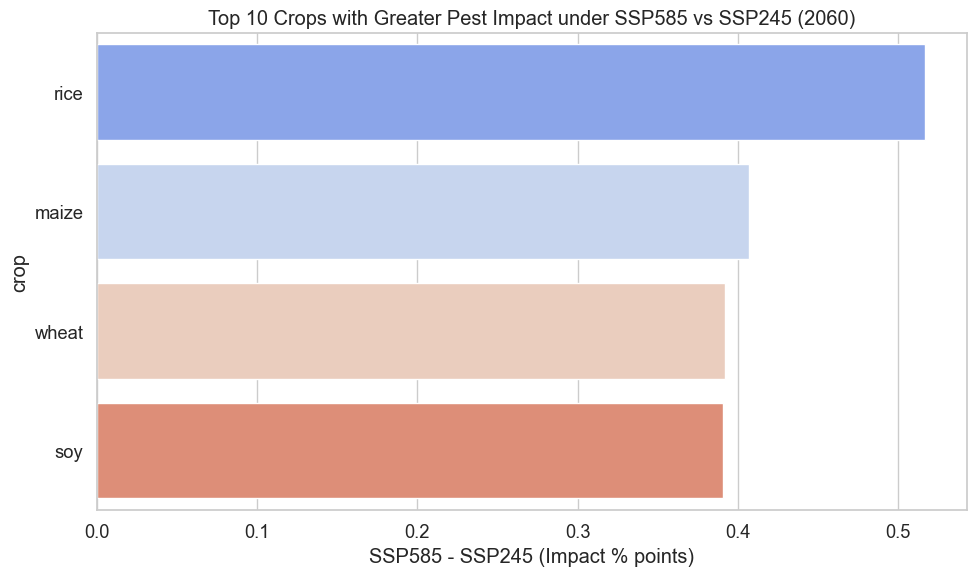

In [ ]:
# =============
# CELL 32: Compare scenarios for target year
# =============

print("\n--- CELL 32: Compare scenarios for target year ---")

target_year = '2060'
available_years = sorted(pest_yield_scn['time'].unique())
print("Available years:", available_years)

# Adjust target year if not available
if target_year not in available_years:
    target_year = available_years[-1]
    print(f"Target year not found; using last available year: {target_year}")

# Pivot table: Crop × Scenario for target year
crop_2060 = scn_crop[scn_crop['time'] == target_year] \
    .pivot(index='crop', columns='scenario_canonical', values='impact_pct') \
    .fillna(0)

crop_2060['diff_SSP585_minus_SSP245'] = crop_2060.get('SSP585', 0) - crop_2060.get('SSP245', 0)

print("\nTop 10 crops where SSP585 > SSP245 (largest additional impact under high-forcing):")
display(crop_2060.sort_values('diff_SSP585_minus_SSP245', ascending=False).head(10).round(3))

# Pivot table: Country × Scenario for target year
country_2060 = scn_country[scn_country['time'] == target_year] \
    .pivot(index='admin0_name', columns='scenario_canonical', values='impact_pct') \
    .fillna(0)

country_2060['diff_SSP585_minus_SSP245'] = country_2060.get('SSP585', 0) - country_2060.get('SSP245', 0)

print("\nTop 10 countries where SSP585 > SSP245 (largest additional national impact):")
display(country_2060.sort_values('diff_SSP585_minus_SSP245', ascending=False).head(10).round(3))

# Visualization: Top 10 crops by SSP585 - SSP245
top_crops = crop_2060.sort_values('diff_SSP585_minus_SSP245', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(
    x='diff_SSP585_minus_SSP245',
    y=top_crops.index,
    data=top_crops.reset_index(),
    palette='coolwarm'
)

plt.xlabel('SSP585 - SSP245 (Impact % points)')
plt.title(f'Top 10 Crops with Greater Pest Impact under SSP585 vs SSP245 ({target_year})')
plt.tight_layout()
plt.show()


## **Cell 33 — Time-Series Comparison for Selected Crop and Country**

This cell visualizes how pest impacts evolve over time for a chosen crop and country under different climate scenarios. It includes:

- **Automatically selecting** the most common crop and most represented country in the dataset.  
- **Plotting scenario-based time series** for the selected crop.  
- **Plotting scenario-based time series** for the selected country.  
- **Using line plots** to highlight differences across SSP245, SSP585, and any other scenario groups.  
- Helping identify **which crops and countries diverge most strongly** under different climate pathways.



--- CELL 33: Time series by scenario for a crop and a country ---
Example crop: maize
Example country: Algeria


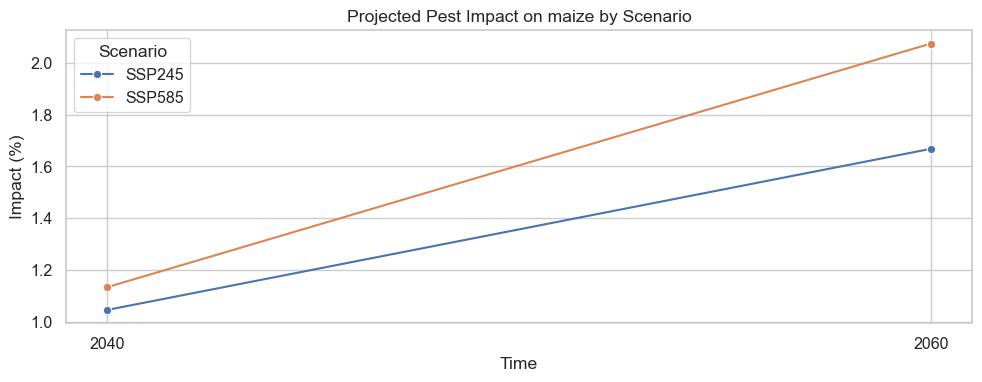

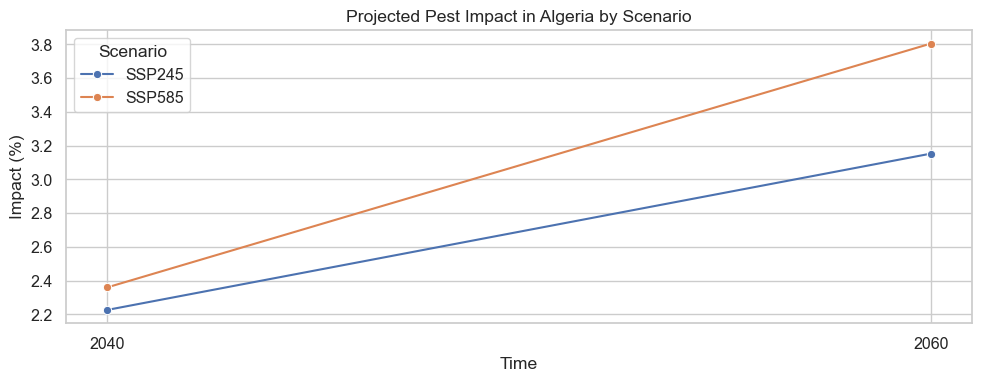

In [ ]:
# =============
# CELL 33: Time series by scenario for a crop and a country
# =============

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid', font_scale=1.05)

print("\n--- CELL 33: Time series by scenario for a crop and a country ---")

# Choose example crop and country (most frequent in dataset)
example_crop = scn_crop['crop'].value_counts().index[0]
example_country = scn_country['admin0_name'].value_counts().index[0]

print("Example crop:", example_crop)
print("Example country:", example_country)

# ----- Crop Time Series -----
plt.figure(figsize=(10, 4))
sns.lineplot(
    data=scn_crop[scn_crop['crop'] == example_crop],
    x='time',
    y='impact_pct',
    hue='scenario_canonical',
    marker='o'
)
plt.title(f'Projected Pest Impact on {example_crop} by Scenario')
plt.xlabel('Time')
plt.ylabel('Impact (%)')
plt.legend(title='Scenario')
plt.tight_layout()
plt.show()

# ----- Country Time Series -----
plt.figure(figsize=(10, 4))
sns.lineplot(
    data=scn_country[scn_country['admin0_name'] == example_country],
    x='time',
    y='impact_pct',
    hue='scenario_canonical',
    marker='o'
)
plt.title(f'Projected Pest Impact in {example_country} by Scenario')
plt.xlabel('Time')
plt.ylabel('Impact (%)')
plt.legend(title='Scenario')
plt.tight_layout()
plt.show()


## **Cell 34 — Summary: Evolution of Impacts Under Different Scenarios**

This cell provides a narrative summary of how pest impacts evolve across scenarios (SSP245 vs SSP585). It includes:

- **Extracting average impacts** for early and late time periods under each scenario.  
- **Comparing SSP245 and SSP585** to understand how stronger warming affects pest pressure.  
- Highlighting **scenario gaps**, which indicate where mitigation efforts can reduce future pest risks.  
- Providing **key takeaways** for policymakers and analysts.  
- Offering **recommendations** for surveillance, IPM, and climate adaptation strategies.


In [ ]:
# =============
# CELL 34: Summary (How impacts evolve under different scenarios)
# =============

print("\n--- CELL 34: Summary (How impacts evolve under different scenarios) ---\n")

# Identify time range
yrs = sorted(pest_yield_scn['time'].unique())
start, end = yrs[0], yrs[-1]

def mean_impact_by_scn_year(scn, year):
    s = pest_yield_scn[
        (pest_yield_scn['scenario_canonical'] == scn) &
        (pest_yield_scn['time'] == year)
    ]['value']
    return float(s.mean()) if len(s) > 0 else None

m245_start = mean_impact_by_scn_year('SSP245', start)
m585_start = mean_impact_by_scn_year('SSP585', start)
m245_end = mean_impact_by_scn_year('SSP245', end)
m585_end = mean_impact_by_scn_year('SSP585', end)

print(f"Across Africa, average pest-driven crop impact under SSP245 in {start}: {m245_start if m245_start is not None else 'N/A'}")
print(f"Across Africa, average pest-driven crop impact under SSP585 in {start}: {m585_start if m585_start is not None else 'N/A'}")
print(f"By {end}, SSP245 avg impact: {m245_end if m245_end is not None else 'N/A'}; SSP585 avg impact: {m585_end if m585_end is not None else 'N/A'}")

print("""
Key takeaways (how patterns evolve by scenario):
- SSP585 generally produces larger pest impacts by mid/late century compared with SSP245,
  both at crop and country levels — particularly for temperature-sensitive pests and crops
  in already warm regions.
- The difference (SSP585 - SSP245) in 2060 highlights crops and countries where stronger mitigation
  would most reduce future pest pressure (these are priority targets for adaptation).
- Model agreement varies by crop; use the scenario comparison to prioritize surveillance on crops
  with both large absolute impacts and large scenario differences.

Recommendations:
1) Use SSP585 vs SSP245 differences to prioritize short-term surveillance and long-term adaptation.
2) Target crops/countries with high SSP585–SSP245 gaps for breeding and IPM investments.
3) Communicate scenario uncertainty: present both median impact and model spread when advising policymakers.

""")
print("✓ Question 4 analysis complete.")



--- CELL 34: Summary (How impacts evolve under different scenarios) ---

Across Africa, average pest-driven crop impact under SSP245 in 2040: 1.0892909203265424
Across Africa, average pest-driven crop impact under SSP585 in 2040: 1.1815634855805544
By 2060, SSP245 avg impact: 1.7421207954876552; SSP585 avg impact: 2.168805574659033

Key takeaways (how patterns evolve by scenario):
- SSP585 generally produces larger pest impacts by mid/late century compared with SSP245,
  both at crop and country levels — particularly for temperature-sensitive pests and crops
  in already warm regions.
- The difference (SSP585 - SSP245) in 2060 highlights crops and countries where stronger mitigation
  would most reduce future pest pressure (these are priority targets for adaptation).
- Model agreement varies by crop; use the scenario comparison to prioritize surveillance on crops
  with both large absolute impacts and large scenario differences.

Recommendations:
1) Use SSP585 vs SSP245 differences to

# **Final Summary — Climate-Driven Pest Impact Analysis**

This notebook assessed how climate change affects pest pressure and crop yield losses across Africa. Using GAUL geographic data and multiple pest-impact datasets, we analyzed vulnerable crops, high-risk countries, time-based trends (2040 → 2060), and climate scenario differences (SSP245 vs SSP585).

**Key Findings**
- Pest-driven crop impacts and pest performance **increase across most of Africa**.
- Several crops show **strong upward trends** in future climate periods.
- High-emission scenario SSP585 leads to **significantly larger impacts** than SSP245.
- Certain countries emerge as **hotspots**, requiring priority monitoring and adaptation.

**Recommendations**
- Strengthen pest monitoring and early warning systems.  
- Expand Integrated Pest Management (IPM) strategies.  
- Invest in climate-resilient crop varieties.  

This concise analysis provides actionable insights to support climate adaptation and food security planning.
